In [4]:
import csv
import json
from py2neo import Graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
PATH_CONNECTION = "../env/neo4j_connection.json"
connection_details = {}
with open(PATH_CONNECTION) as connection_file:
    connection_file_read = json.load(connection_file)
    connection_details['bolt_url'] = connection_file_read['bolt_url']
    connection_details['password'] = connection_file_read['password']
graph = Graph(connection_details['bolt_url'], auth=("neo4j", connection_details['password']))

In [18]:
PATH_EDGE_LIST = "../data/movies.edgelist"

In [9]:
with graph as graph, open(PATH_EDGE_LIST, "w") as edges_file:
    result = graph.run("""
    MATCH (m:Movie)--(other)
    RETURN id(m) AS source, id(other) AS target
    """)
    
    writer = csv.writer(edges_file, delimiter=",")
    
    for row in result:
        writer.writerow([row['source'], row['target']])

Genre Distribution:

In [9]:
data = graph.run("""
    MATCH (m:Movie)-[:IN_GENRE]->(g:Genre)
    RETURN id(m) as id, m.title as title, collect(g.name) as genres
    """).data()

In [10]:
result_pd = pd.DataFrame(data)

In [11]:
movies_by_genre = pd.DataFrame(result_pd.explode('genres').groupby('genres', as_index=False).count())
movies_by_genre['count'] = movies_by_genre['id']
movies_by_genre = movies_by_genre.drop(['id', 'title'], axis=1)
movies_by_genre = movies_by_genre.sort_values('count', ascending=False)

In [12]:
movies_by_genre['perc_movies'] = 100*movies_by_genre['count']/num_movies

In [13]:
movies_by_genre

,genres,count,perc_movies
8,Drama,4365,47.835616
5,Comedy,3315,36.328767
17,Thriller,1729,18.947945
1,Action,1545,16.931507
15,Romance,1545,16.931507
2,Adventure,1117,12.241096
6,Crime,1100,12.054795
11,Horror,877,9.610959
16,Sci-Fi,792,8.679452
9,Fantasy,654,7.167123


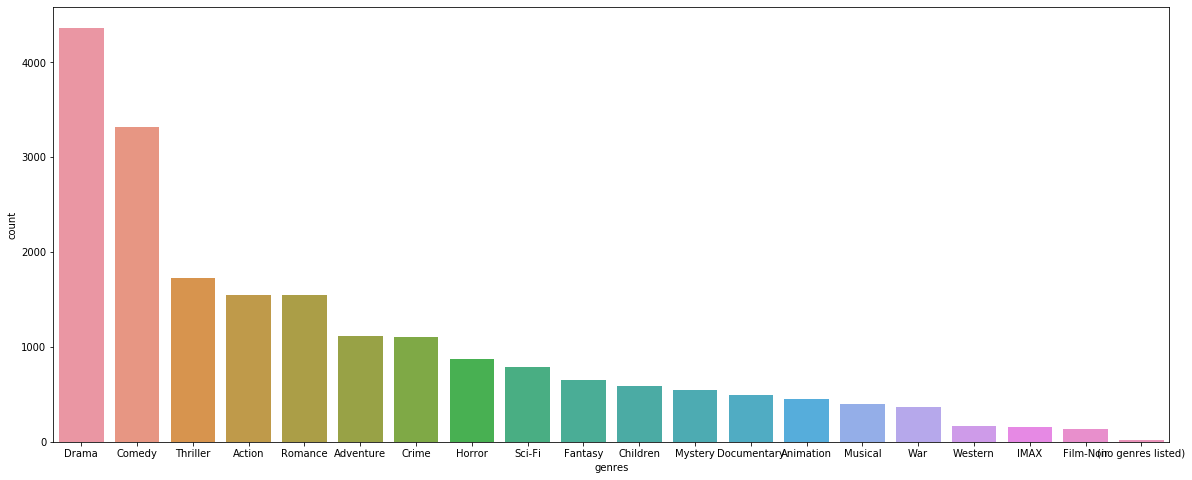

In [14]:
plt.figure(figsize=(20, 8))
sns.barplot(movies_by_genre['genres'], movies_by_genre['count'])

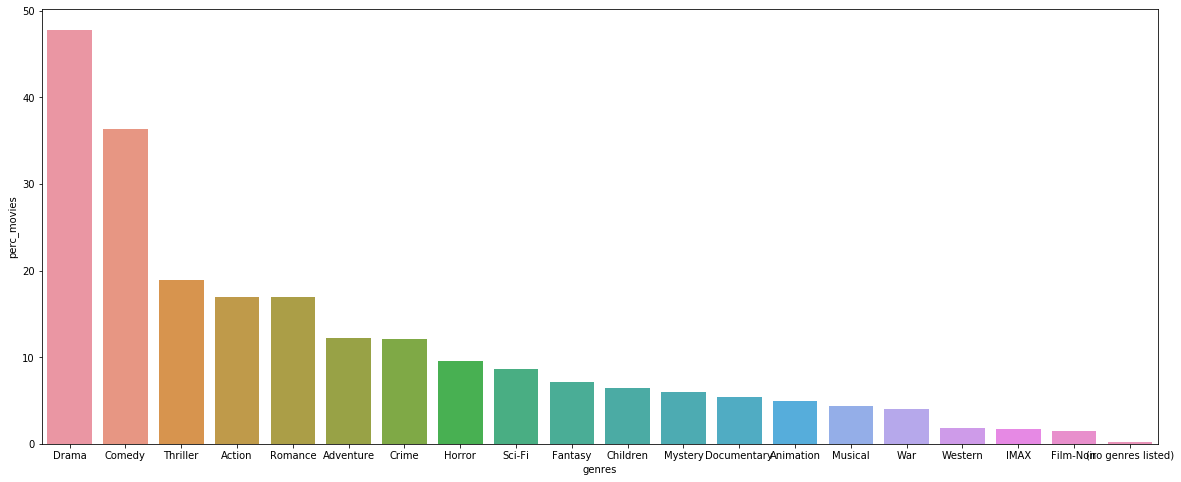

In [15]:
plt.figure(figsize=(20, 8))
sns.barplot(movies_by_genre['genres'], movies_by_genre['perc_movies'])